In [19]:
### import librarys 

import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [14]:
data = pd.read_csv("HomeC.csv")
                     
data.info()

C:\Users\Preethi\AppData\Local\Temp\ipykernel_1600\865369242.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("HomeC.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [15]:
data.head(5)




,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [16]:
data.tail(5)



,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.dtypes

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

In [10]:
data.shape

(503911, 32)

In [23]:
data = data[0:-1] ## == dataset[0:dataset.shape[0]-1] == dataset[0:len(dataset)-1] == dataset[:-1]
data.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,0.000467,0.000150,0.000017,0.032283,0.000983,0.003800,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.000950,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.001000,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.000950,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.000950,0.003767,0.000950,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [25]:
data.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [26]:
data.columns = [col.replace(' [kW]', '') for col in data.columns]
data.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [27]:
data['sum_Furnace'] = data[['Furnace 1','Furnace 2']].sum(axis=1)
data['avg_Kitchen'] = data[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)

In [28]:
import time 
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1451624400)))

 start  2016-01-01 10:30:00


In [29]:
import time 
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(data['time'].iloc[0]))))

 start  2016-01-01 10:30:00


In [33]:
time_index = pd.date_range('2016-01-01 05:00', periods=len(data),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
data = data.set_index(time_index)
data = data.drop(['time'], axis=1)
data.iloc[np.r_[0:5,-5:0]].iloc[:,0] #numpy.r is the simple way to build up arrays quickly,
#you can use the array to index your dataframe. For example, here I want to see the first and the last 5 samples

2016-01-01 05:00:00    0.932833
2016-01-01 05:01:00    0.934333
2016-01-01 05:02:00    0.931817
2016-01-01 05:03:00    1.022050
2016-01-01 05:04:00    1.139400
2016-12-16 03:25:00    1.601233
2016-12-16 03:26:00    1.599333
2016-12-16 03:27:00    1.924267
2016-12-16 03:28:00    1.978200
2016-12-16 03:29:00    1.990950
Name: use, dtype: float64

<Axes: >

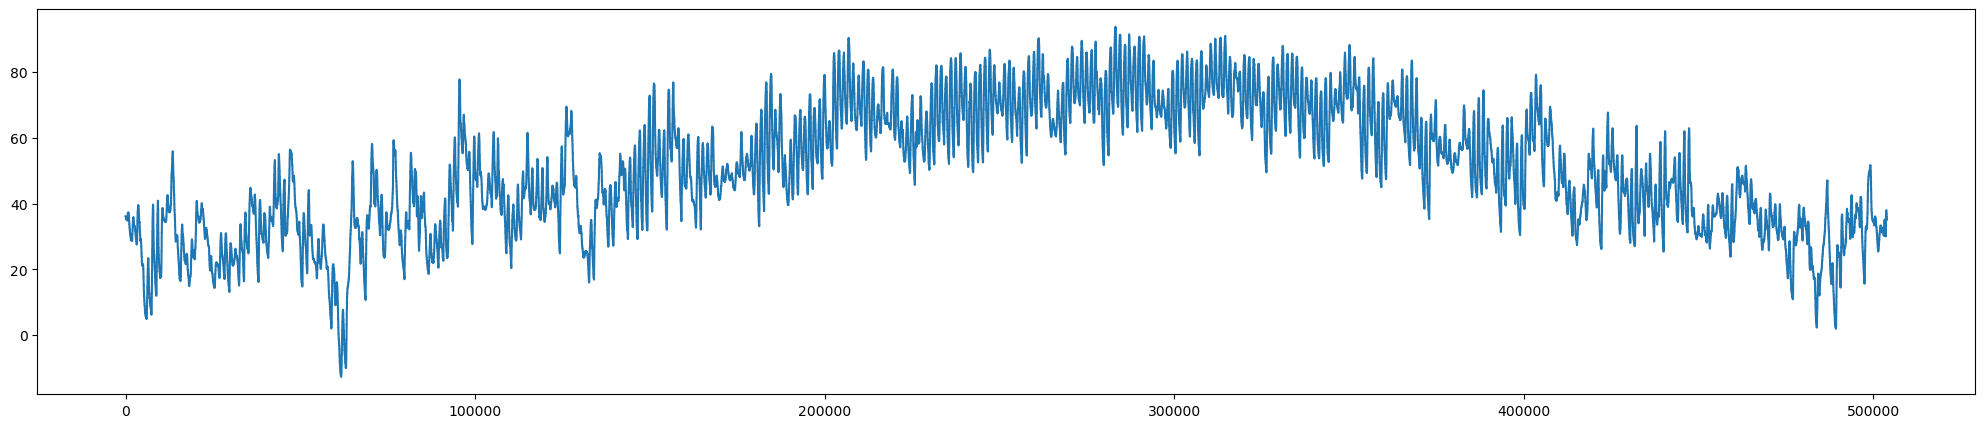

In [32]:
data['temperature'].plot(figsize=(25,5))

<Axes: >

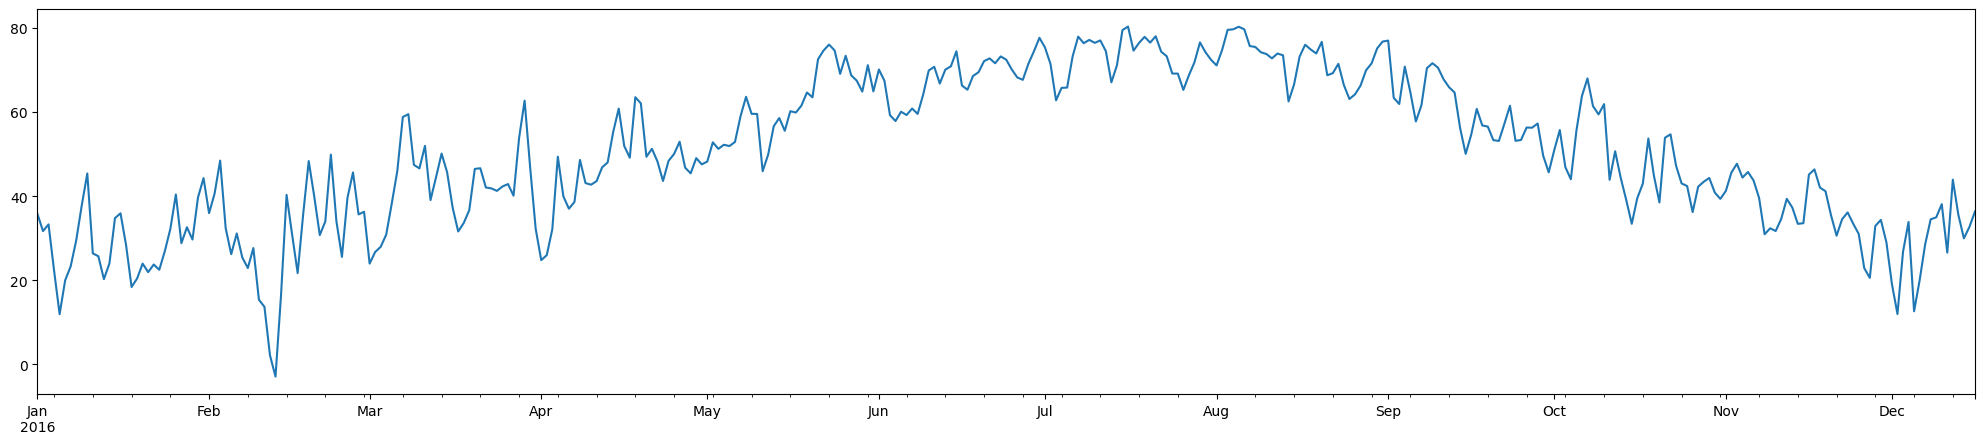

In [34]:
## pandas.DataFrame.resample: Convenience method for frequency conversion and resampling of time series. 
data['temperature'].resample(rule='D').mean().plot(figsize=(25,5)) #D calendar day frequency

In [35]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,5)

<Axes: >

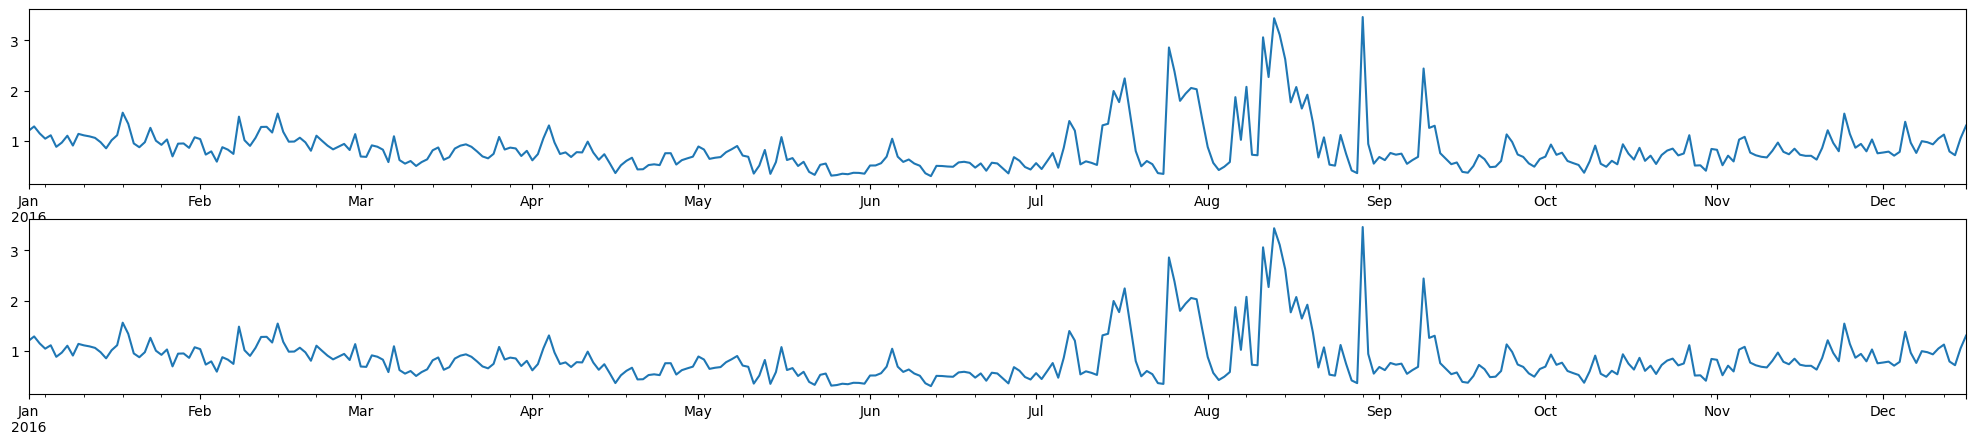

In [36]:
#It seems use and House overall show the same data. Let's visualize these two columns.

fig, axes = plt.subplots(nrows=2, ncols=1)
data['use'].resample('D').mean().plot(ax=axes[0]) #D calendar day frequency
data['House overall'].resample('D').mean().plot(ax=axes[1]) #D calendar day frequency

In [37]:
#They are same. It's better to remove one of them.

data = data.drop(columns=['House overall'])
data.shape

(503910, 32)

In [38]:
## pandas.Series.value_counts: Return a Series containing counts of unique values.
data['icon'].value_counts()

clear-night            194536
clear-day              182252
rain                    43081
partly-cloudy-day       39492
partly-cloudy-night     27324
snow                     7550
cloudy                   6041
wind                     2660
fog                       974
Name: icon, dtype: int64

In [39]:
data['summary'].value_counts()

Clear                       376730
Partly Cloudy                62268
Light Rain                   27368
Drizzle                      10370
Overcast                      6041
Rain                          5169
Mostly Cloudy                 4548
Light Snow                    4323
Flurries                      1789
Breezy                        1561
Snow                          1152
Breezy and Partly Cloudy      1041
Foggy                          974
Rain and Breezy                174
Heavy Snow                     171
Flurries and Breezy            115
Breezy and Mostly Cloudy        58
Dry                             58
Name: summary, dtype: int64

In [40]:
data = data.drop(columns=['summary', 'icon'])
data.shape

(503910, 30)

In [41]:
## pandas.Series.unique: Uniques are returned in order of appearance. Hash table-based unique, therefore does NOT sort.
data['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [42]:
data[data['cloudCover']=='cloudCover'].shape

(58, 30)

In [43]:
data['cloudCover'][56:60]

2016-01-01 05:56:00    cloudCover
2016-01-01 05:57:00    cloudCover
2016-01-01 05:58:00          0.75
2016-01-01 05:59:00          0.75
Freq: T, Name: cloudCover, dtype: object

In [44]:
#We replace this missing valuess with the next valid observation we have.

data['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
data['cloudCover'] = data['cloudCover'].astype('float')
data['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

In [45]:
data['cloudCover'][56:60]

2016-01-01 05:56:00    0.75
2016-01-01 05:57:00    0.75
2016-01-01 05:58:00    0.75
2016-01-01 05:59:00    0.75
Freq: T, Name: cloudCover, dtype: float64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   Dishwasher           503910 non-null  float64
 3   Furnace 1            503910 non-null  float64
 4   Furnace 2            503910 non-null  float64
 5   Home office          503910 non-null  float64
 6   Fridge               503910 non-null  float64
 7   Wine cellar          503910 non-null  float64
 8   Garage door          503910 non-null  float64
 9   Kitchen 12           503910 non-null  float64
 10  Kitchen 14           503910 non-null  float64
 11  Kitchen 38           503910 non-null  float64
 12  Barn                 503910 non-null  float64
 13  Well                 503910 non-null  float64
 14  Microwave            50391

In [47]:
data = data.resample('D').mean()
print("Shape of daily dataset: {} --> n_rows = {}, n_cols = {}".format(data.shape, data.shape[0],data.shape[1]))

Shape of daily dataset: (351, 30) --> n_rows = 351, n_cols = 30


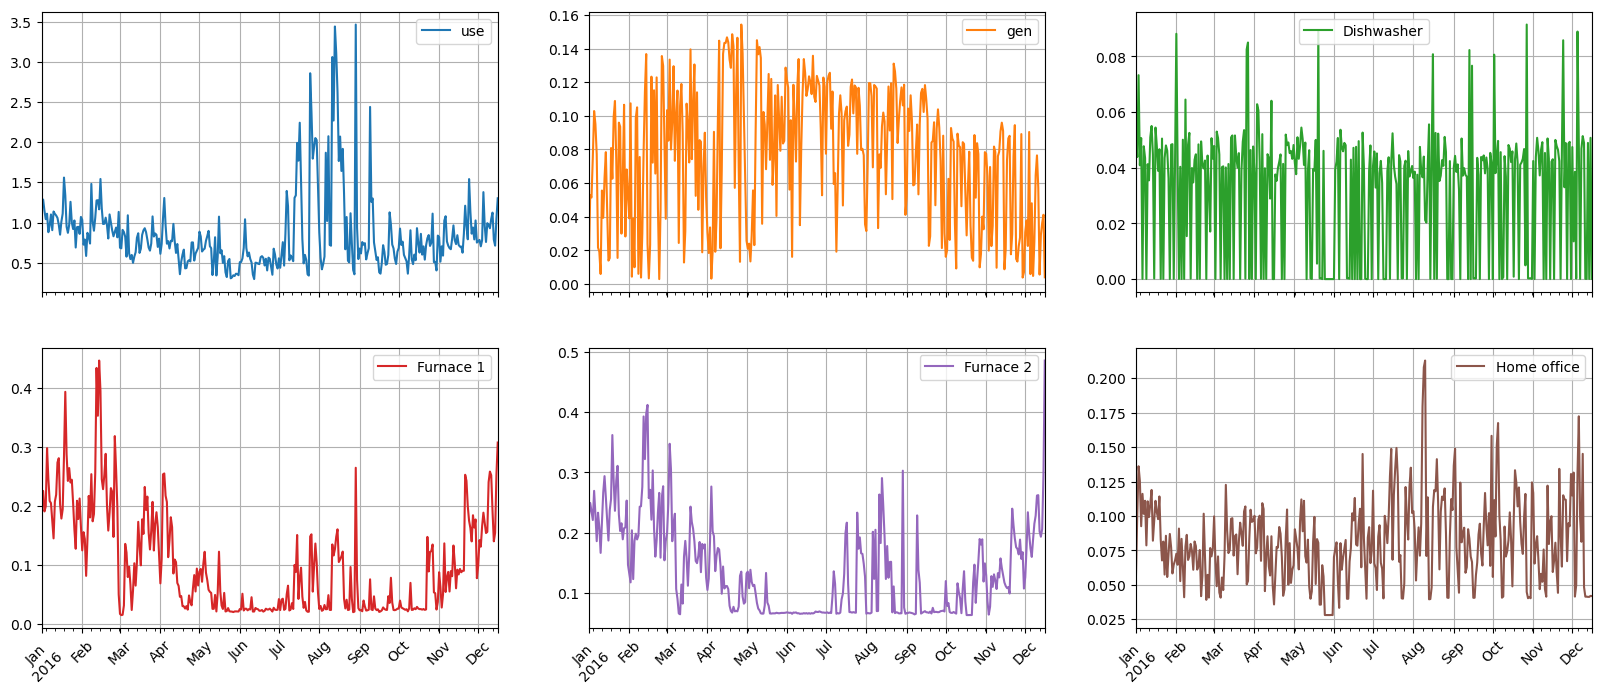

In [48]:
#Visualizations
#First 6 Energy columns (resample by day (rule=D or 1440Min))
data[data.columns[0:6].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 8),
                                                                grid=True, rot=45);

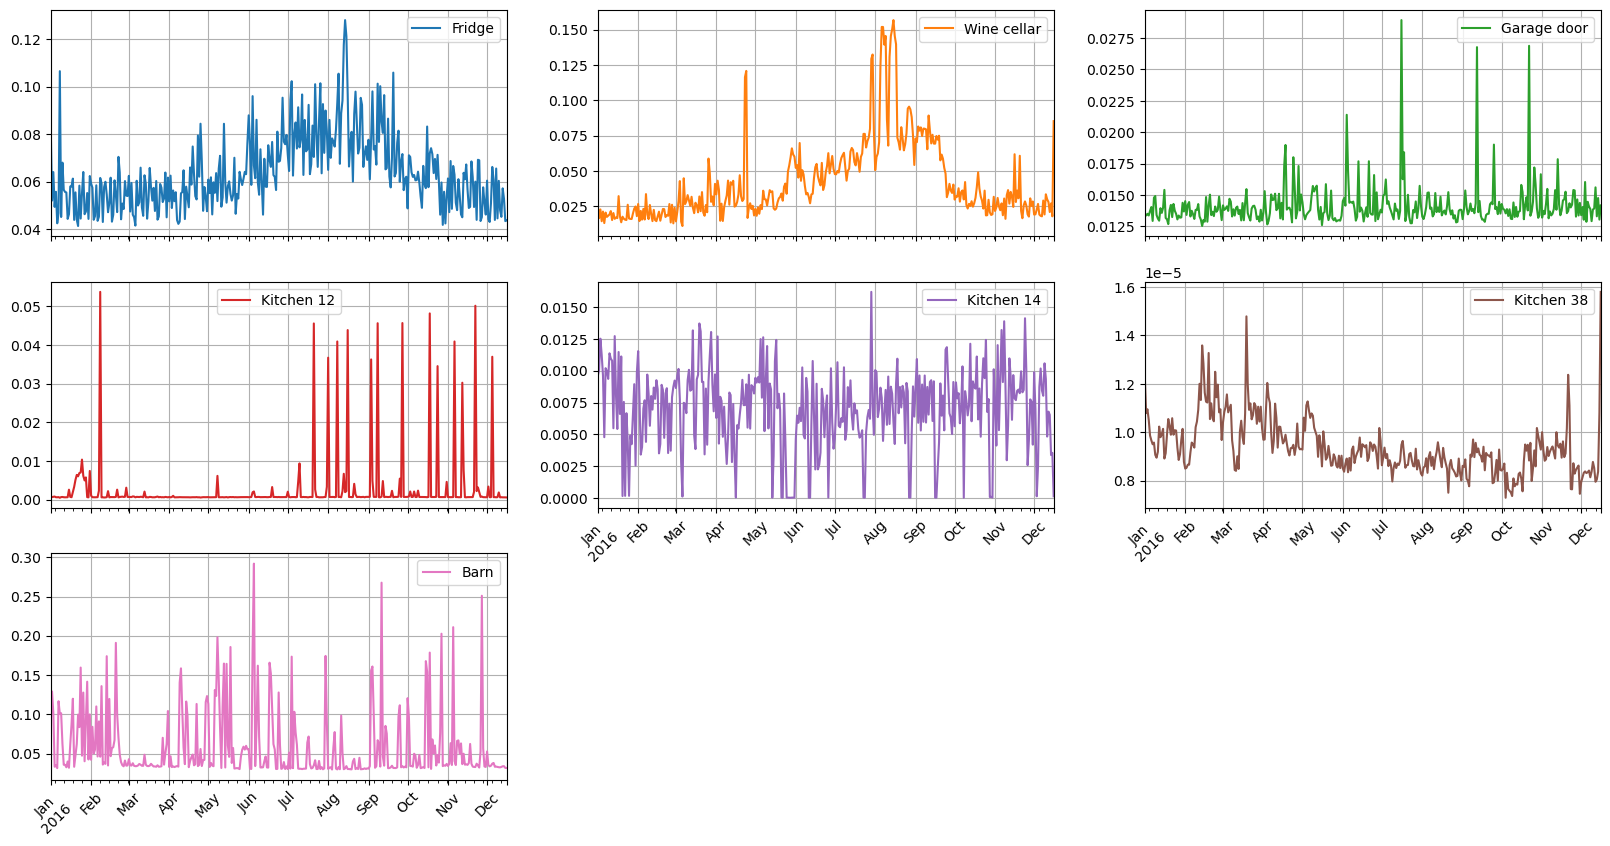

In [49]:
# Rest of Energy columns
data[data.columns[6:13].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 10),
                                                                grid=True, rot=45, xlabel=None);

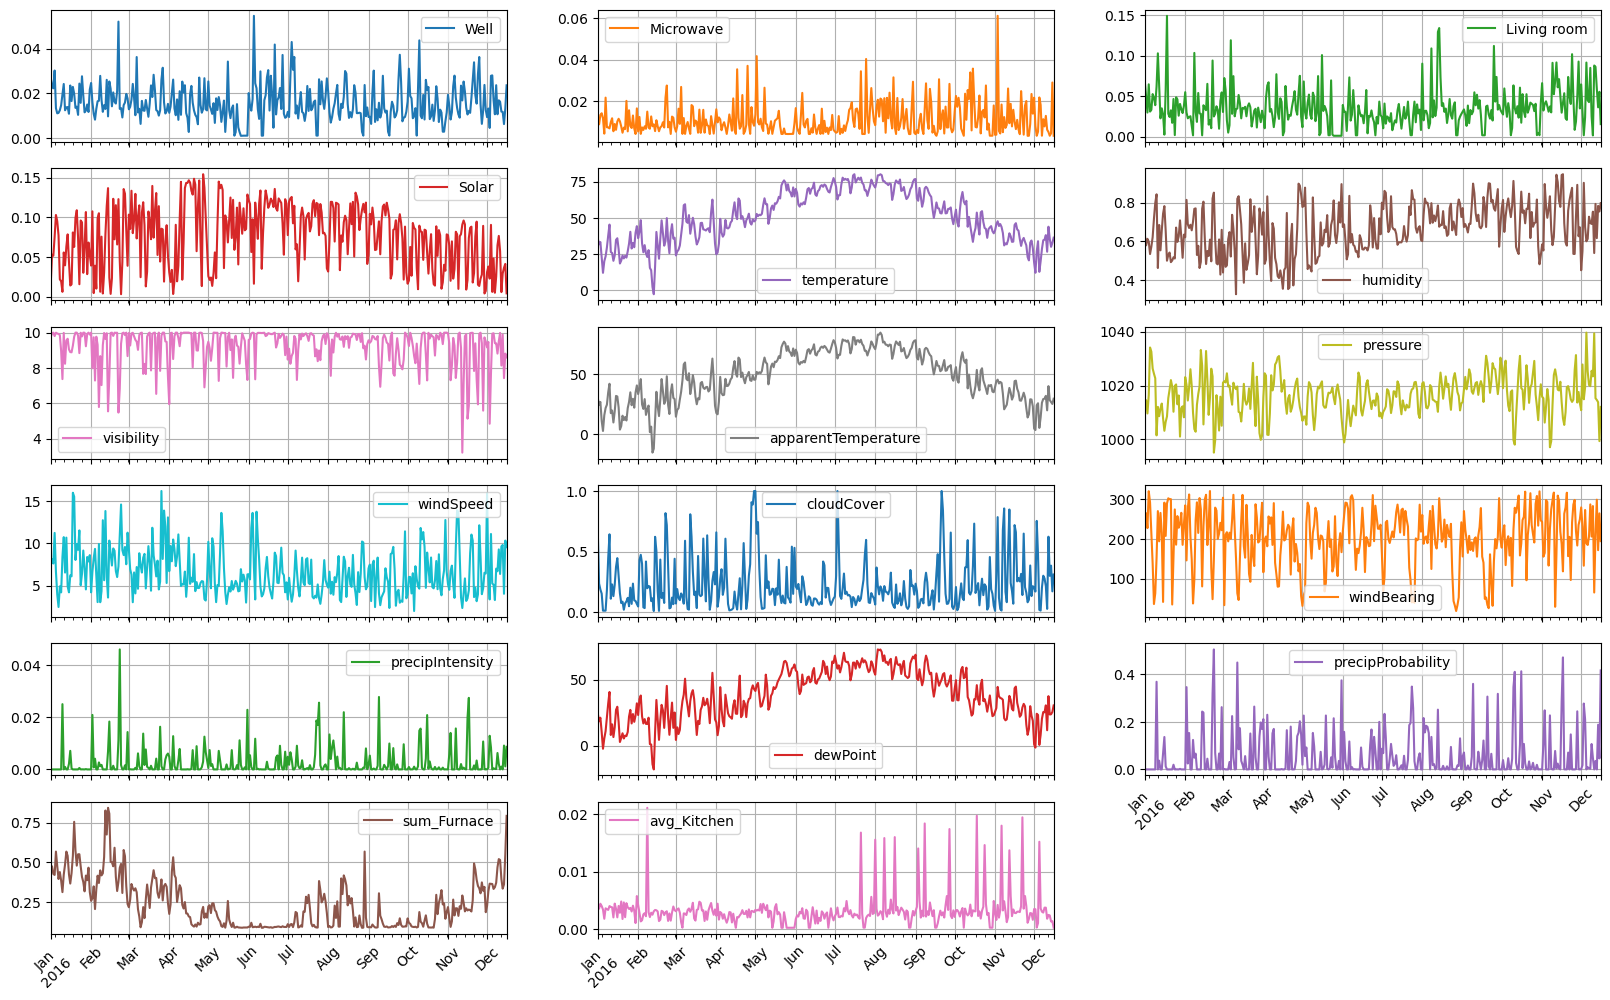

In [50]:
#Visualize wheather data
data[data.columns[13:].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 12),
                                                                grid=True, rot=45, xlabel=None);

In [51]:
#Groupings
#Define new columns from datetime
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.day_name()
data['hour'] = data.index.hour
data['minute'] = data.index.minute
data.head(2)

,use,gen,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,sum_Furnace,avg_Kitchen,month,day,weekday,hour,minute
2016-01-01,1.198482,0.015812,0.052208,0.203354,0.228243,0.056727,0.083106,0.025520,0.013358,0.000588,0.009593,0.000012,0.087389,0.026787,0.011369,0.067607,0.015812,35.725737,0.631825,9.759298,29.815211,1014.740316,7.386772,0.669456,263.689474,0.000112,24.429175,0.002035,0.431597,0.003398,1,1,Friday,0,0
2016-01-02,1.285779,0.052813,0.043857,0.225466,0.249369,0.101090,0.051980,0.016734,0.013366,0.000657,0.010072,0.000011,0.129012,0.023395,0.008667,0.049405,0.052813,31.692569,0.580056,9.953722,24.462806,1014.510944,8.148319,0.235000,264.529167,0.000000,18.498597,0.000000,0.474835,0.003580,1,2,Saturday,0,0


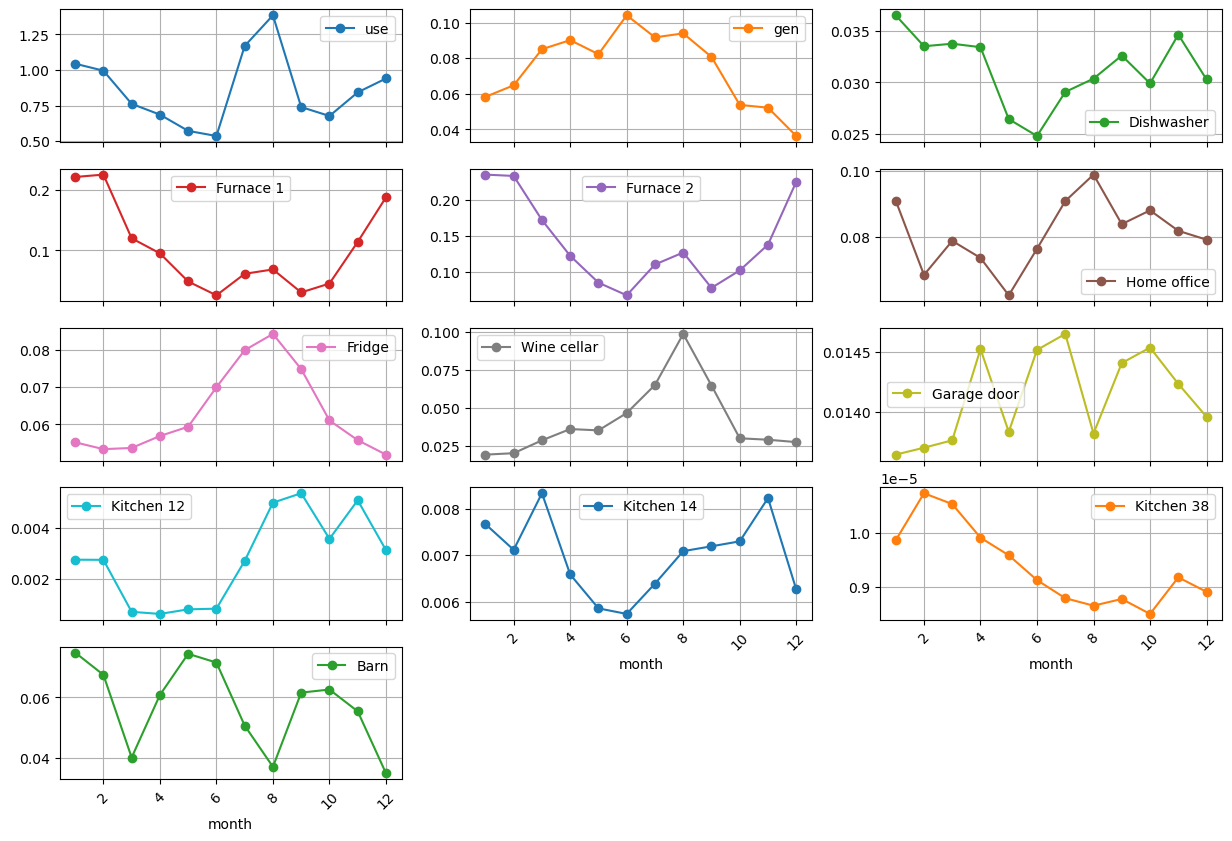

In [52]:
#Month
##Averge consuption per month
mean_month = data.groupby('month').agg({i:'mean' for i in data.columns[:-5].tolist()})
mean_month[mean_month.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');

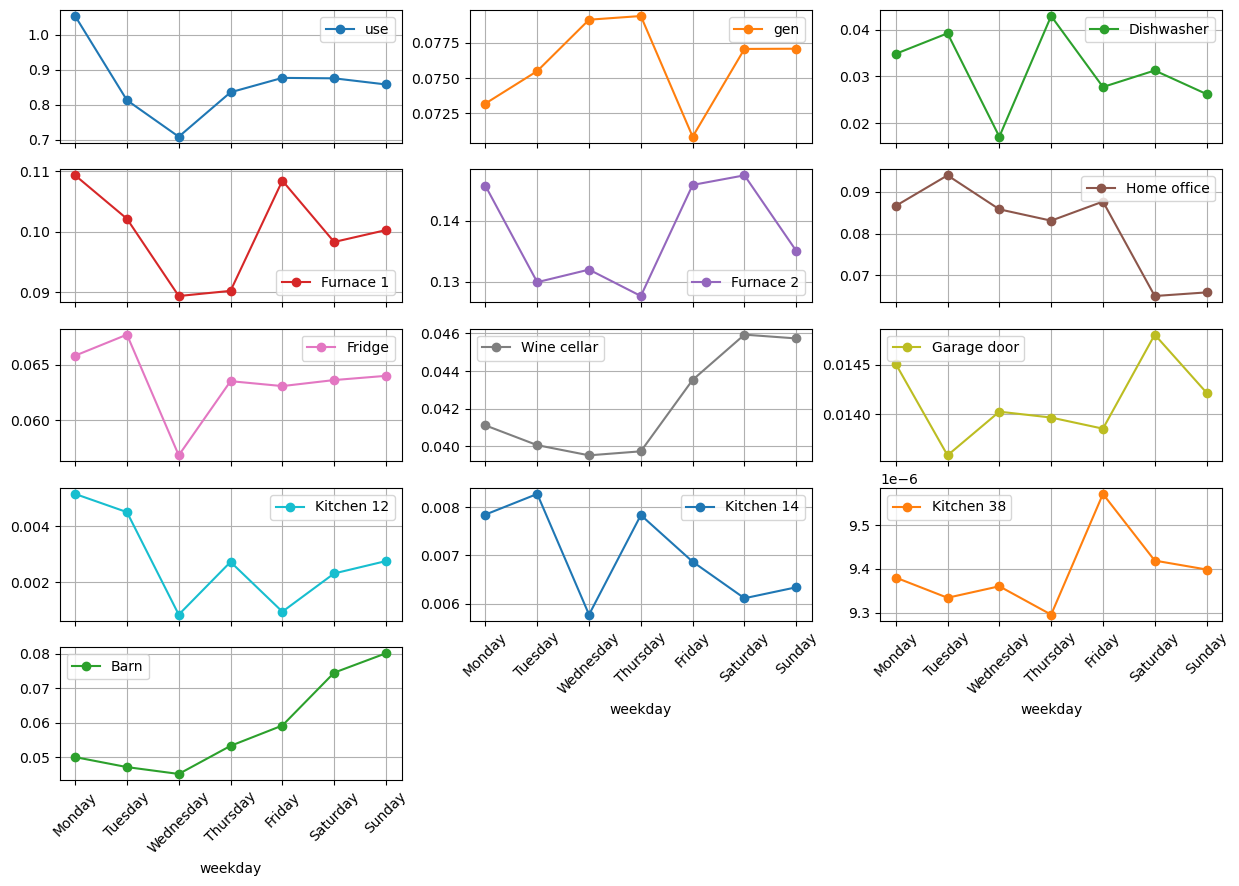

In [53]:
#Weekday
#Averge consuption per day of the week
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_weekday = data.groupby('weekday').agg({i:'mean' for i in data.columns[:-5].tolist()}).reindex(days)

mean_weekday[mean_weekday.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');

In [56]:
#Time-Series Prediction with LSTM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)
usedf = data['use']
usedf.head()

2016-01-01    1.198482
2016-01-02    1.285779
2016-01-03    1.146617
2016-01-04    1.042143
2016-01-05    1.109701
Freq: D, Name: use, dtype: float64

In [57]:
usedf.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 351 entries, 2016-01-01 to 2016-12-16
Freq: D
Series name: use
Non-Null Count  Dtype  
--------------  -----  
351 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


In [61]:
usedf=usedf.to_frame()

In [62]:
# This function is used to prepare the time-series data
# according to the problem definition.
def add_lags(series, times):
  cols = []
  column_index = []
  for time in times:
    cols.append(series.shift(-time))
    lag_fmt = "t+{time}" if time > 0 else "t{time}" if time < 0 else "t"
    column_index += [(lag_fmt.format(time=time), col_name)
        for col_name in series.columns]
  df = pd.concat(cols, axis=1)
  df.columns = pd.MultiIndex.from_tuples(column_index)
  return df


In [63]:
 X = add_lags(usedf, times=range(-30+1,1)).iloc[30:-5]
y = add_lags(usedf, times=[5]).iloc[30:-5]

In [64]:
X.head()

,t-29,t-28,t-27,t-26,t-25,t-24,t-23,t-22,t-21,t-20,t-19,t-18,t-17,t-16,t-15,t-14,t-13,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use
2016-01-31,1.285779,1.146617,1.042143,1.109701,0.880044,0.964197,1.100592,0.905353,1.137600,1.108112,1.087707,1.057835,0.972452,0.849664,1.011319,1.111196,1.559358,1.338234,0.947373,0.871978,0.972101,1.257965,1.001793,0.919517,1.025885,0.689653,0.942827,0.946987,0.859326,1.070224
2016-02-01,1.146617,1.042143,1.109701,0.880044,0.964197,1.100592,0.905353,1.137600,1.108112,1.087707,1.057835,0.972452,0.849664,1.011319,1.111196,1.559358,1.338234,0.947373,0.871978,0.972101,1.257965,1.001793,0.919517,1.025885,0.689653,0.942827,0.946987,0.859326,1.070224,1.033505
2016-02-02,1.042143,1.109701,0.880044,0.964197,1.100592,0.905353,1.137600,1.108112,1.087707,1.057835,0.972452,0.849664,1.011319,1.111196,1.559358,1.338234,0.947373,0.871978,0.972101,1.257965,1.001793,0.919517,1.025885,0.689653,0.942827,0.946987,0.859326,1.070224,1.033505,0.725450
2016-02-03,1.109701,0.880044,0.964197,1.100592,0.905353,1.137600,1.108112,1.087707,1.057835,0.972452,0.849664,1.011319,1.111196,1.559358,1.338234,0.947373,0.871978,0.972101,1.257965,1.001793,0.919517,1.025885,0.689653,0.942827,0.946987,0.859326,1.070224,1.033505,0.725450,0.789036
2016-02-04,0.880044,0.964197,1.100592,0.905353,1.137600,1.108112,1.087707,1.057835,0.972452,0.849664,1.011319,1.111196,1.559358,1.338234,0.947373,0.871978,0.972101,1.257965,1.001793,0.919517,1.025885,0.689653,0.942827,0.946987,0.859326,1.070224,1.033505,0.725450,0.789036,0.584781


In [65]:
y.head()

,t+5
,use
2016-01-31,0.872563
2016-02-01,0.823736
2016-02-02,0.739130
2016-02-03,1.480771
2016-02-04,1.011274


In [66]:
train_slice = slice(None, "2016-10-30")
test_slice = slice("2016-11-1", None)

In [68]:
# Split the dataset into 80% training and 20% testing as follows
X_train, y_train = X.loc[train_slice], y.loc[train_slice]
X_test, y_test = X.loc[test_slice], y.loc[test_slice]
print(X_train.shape)
print(X_test.shape)

(274, 30)
(41, 30)


In [70]:
def multilevel_df_to_ndarray(df):
  shape = [-1] + [len(level) for level in df.columns.remove_unused_levels().levels]
  return df.values.reshape(shape)
X_train_3D = multilevel_df_to_ndarray(X_train)
X_test_3D = multilevel_df_to_ndarray(X_test)
print(X_train_3D.shape)
print(X_test_3D.shape)

(274, 30, 1)
(41, 30, 1)


In [71]:
y_train = y_train.values
y_test = y_test.values
print(y_train.shape)

print(y_test.shape)


(274, 1)
(41, 1)


In [72]:
model_LSTM = keras.models.Sequential()
model_LSTM.add(keras.layers.LSTM(units = 100, return_sequences = True,input_shape = X_train_3D.shape[1:]))
model_LSTM.add(keras.layers.LSTM(units = 50))
model_LSTM.add(keras.layers.Dense(1))
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71051 (277.54 KB)
Trainable params: 71051 (277.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model_LSTM.compile(loss='mse', optimizer='adam', metrics=['mae'])
history_LSTM = model_LSTM.fit(x=X_train_3D, y=y_train,epochs=50, validation_split=0.1, batch_size=32)

Epoch 1/50
8/8 [==============================] - 17s 310ms/step - loss: 0.4461 - mae: 0.4767 - val_loss: 0.0604 - val_mae: 0.2032
Epoch 2/50
8/8 [==============================] - 0s 54ms/step - loss: 0.2778 - mae: 0.3399 - val_loss: 0.0341 - val_mae: 0.1510
Epoch 3/50
8/8 [==============================] - 0s 53ms/step - loss: 0.2614 - mae: 0.3357 - val_loss: 0.0540 - val_mae: 0.1911
Epoch 4/50
8/8 [==============================] - 1s 61ms/step - loss: 0.2641 - mae: 0.3457 - val_loss: 0.0326 - val_mae: 0.1510
Epoch 5/50
8/8 [==============================] - 1s 76ms/step - loss: 0.2560 - mae: 0.3296 - val_loss: 0.0381 - val_mae: 0.1595
Epoch 6/50
8/8 [==============================] - 1s 59ms/step - loss: 0.2569 - mae: 0.3306 - val_loss: 0.0350 - val_mae: 0.1543
Epoch 7/50
8/8 [==============================] - 0s 55ms/step - loss: 0.2579 - mae: 0.3435 - val_loss: 0.0357 - val_mae: 0.1553
Epoch 8/50
8/8 [==============================] - 0s 59ms/step - loss: 0.2536 - mae: 0.3260 - v

In [74]:
test_loss, test_mae = model_LSTM.evaluate(x=X_test_3D, y=y_test)

print(test_loss, test_mae)

2/2 [==============================] - 0s 33ms/step - loss: 0.0535 - mae: 0.1713
0.053502682596445084 0.17131903767585754
